## Part III - Logistic regression 

### Part III.1 - Sigmoid
You will learn to use logistic regression for text classification. 
* The sigmoid function is defined as: 

$$ \sigma(z) = \frac{1}{1+\exp^{-z}} \tag{1}$$

It maps the input 'z' to a value that ranges between 0 and 1, and so it can be treated as a probability. 

<div style="width:image width px; font-size:100%; text-align:center;"><img src='./sigmoid_function.png' alt="alternate text" width="width" height="height" style="width:800px;height:400px;"/> </div>

In [20]:
def sigmoid(z): 
    '''
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    ''' 
    h = 1. / (1. + np.exp(-z))
    return h

### PART III.2 - Logistic regression

Logistic regression takes a regular linear regression, and applies a sigmoid to the output of the linear regression.

#### Regression (logit)
$$z = w_0 + w_1 x_1 + w_2 x_2 + \ldots + w_n x_n$$
In our case $n$ is equal to $2$.

#### The prediction
$$ y_{\text{pred}} = \sigma(z) = \frac{1}{1+\exp^{-z}}$$

#### Loss function (binary log-loss)
$$J(w) = -\frac{1}{m} \sum_{i=1}^m y^{(i)}\log (y_{\text{pred}}^{(i)}) + (1-y^{(i)})\log (1-y_{\text{pred}}^{(i)})$$
* $w = (w_0, w_1, w_2)$ is model parameters
* $m$ is the number of training examples
* $y^{(i)}$ is the actual label of training example 'i'.
* $h(z^{(i)})$ is the model's prediction for the training example 'i'.

The goal of a training process is to minimize the loss function $J(w)$ on the training set.


#### Gradient descent

<div style="width:image width px; font-size:100%; text-align:center;"><img src='./gradient_descent.png' alt="alternate text" width="width" height="height" style="width:800px;height:400px;"/> </div>

Compute the gradient
$$\dfrac{\partial J}{\partial w_j} (w) = \frac{1}{m} \sum_{i=1}^m(y_{\text{pred}}^{(i)}-y^{(i)})x^{(i)}_j$$
Update the weights $w$
$$w_j = w_j - \alpha \dfrac{\partial J}{\partial w_j} (w)$$

#### Matrix form and implementation
* $w$ has dimensions (n+1, 1), where 'n' is the number of features, and there is one more element for the bias term $w_0$
* The 'logits', 'z', are calculated by multiplying the feature matrix $X$ with the weight vector $w$ i.e. $z = Xw$
    * $X$ has dimensions (m, n+1) 
    * $w$: has dimensions (n+1, 1)
    * $z$: has dimensions (m, 1)
* The prediction $y_{\text{pred}}$, is calculated by applying the sigmoid to $z$, and has dimensions (m,1).
* The cost function $J$ in its vector form
$$J = -\frac{1}{m} \times \left(y^T \cdot log(y_{\text{pred}}) + (1-y)^T \cdot log(1 - y_{\text{pred}}) \right)$$
* The update of $w$ is also vectorized
$$w = w - \frac{\alpha}{m} \times \left( X^T \cdot \left(y_{\text{pred}} - y\right) \right)$$



In [21]:
import matplotlib.pyplot as plt

def gradient_descent_logistic(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    Hint: you might want to print the cost to make sure that it is going down.
    '''
    # get 'm', the number of rows in matrix X
    m = len(x)
    epsilon = 1e-4
    losses = []
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z = np.dot(x, theta)
        
        # get the sigmoid of z
        h = sigmoid(z)
        
        # calculate the cost function
        J = - (np.dot(y.T, np.log(h+epsilon)) + np.dot((1-y).T, np.log(1-h+epsilon))) / float(m)
        losses.append(float(J))
        # update the weights theta
        theta = theta - (alpha * np.dot(x.T, (h-y))) / float(m)
    
    J = float(J)
    
    # plot the loss function
    iter_list = np.arange(1, num_iters + 1, 1)
    plt.plot(iter_list, losses, color='green', label='loss')
    plt.xlabel('number of iterations')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

    return J, theta

#### Expected output
```
The cost after training is 0.67094970.
The resulting vector of weights is [4.1e-07, 0.00035658, 7.309e-05]
```

### PART III.3 - Logistic Regression training

* Stack the features for all training examples into a matrix X. 
* Call gradient_descent_logistic function.

C:\Users\Admin\AppData\Local\Temp\ipykernel_3472\3827021297.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  losses.append(float(J))
C:\Users\Admin\AppData\Local\Temp\ipykernel_3472\3827021297.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J = float(J)


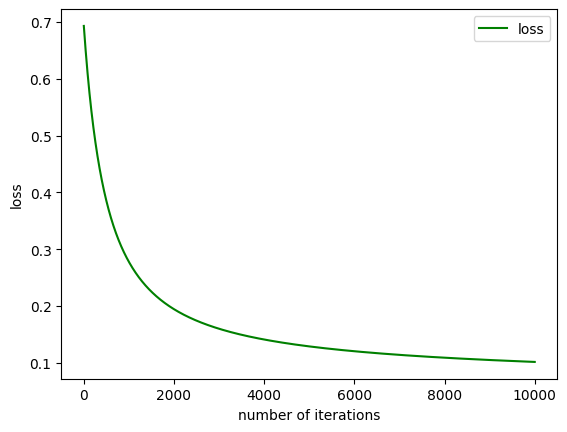

The cost after training is 0.10146510.
The resulting vector of weights is [np.float64(0.00127323), np.float64(-0.001111), np.float64(0.0), np.float64(1e-08), np.float64(1.5e-07), np.float64(5.7e-07)]


In [22]:
X_train = np.zeros((len(train_x), 6))
for i in range(len(train_x)):
    X_train[i, :]= extract_features(train_x[i], freqs)

Y = train_y
J, w = gradient_descent_logistic(X_train, Y, np.zeros((6, 1)), 1e-9, 10000)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(w)]}")

Note: If we set the iteration at 100000, you might encounter the problem dividing by zero in the log. Correct this issue.

In [23]:
# Save the weights (a numpy array) in a binary .npy format.
np.save("sentiment_analysis_logistic_weights.npy",w)

In [24]:
w = np.load("sentiment_analysis_logistic_weights.npy")
w 

array([[ 1.27323039e-03],
       [-1.11100070e-03],
       [ 0.00000000e+00],
       [ 1.41479788e-08],
       [ 1.46027226e-07],
       [ 5.72784238e-07]])

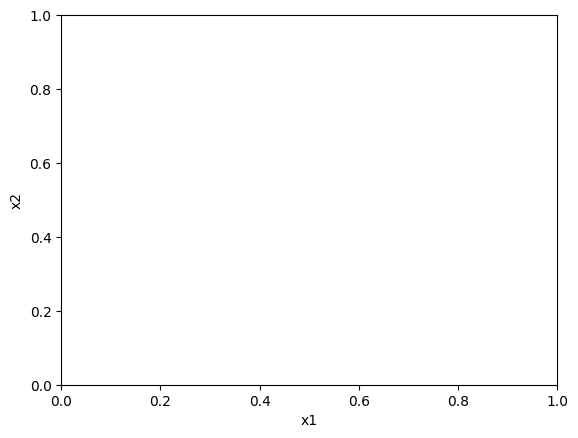

In [25]:
# Plot the decision boundary
x1 = np.arange(0, 10000, 10)
x2 = np.arange(0, 10000, 10)

x1, x2 = np.meshgrid(x1, x2)
params = np.squeeze(w)
g = params[0] + params[1] * x1 + params[2] * x2

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x1, x2, g)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#### Write a function to predict whether a tweet is positive or negative.
* Given a tweet, process it, then extract the features.
* Apply the model's learned weights $w$ on the features to get the logits.
* Apply the sigmoid to the logits to get the prediction (a value between 0 and 1).

$$y_{pred} = \sigma(X \cdot w)$$

In [26]:
def predict_tweet(tweet, freqs, theta):
    """
    Predict the probability that a tweet is positive.
    
    Args:
        tweet: str, raw tweet text
        freqs: frequency dictionary
        theta: weight vector of shape (n_features, 1)
        feature_fn: feature extractor (e.g., extract_features, extract_features_v2)
        
    Returns:
        y_pred: float, probability between 0 and 1
    """
    # Extract features for this tweet
    x = extract_features(tweet, freqs)   # shape (1, n_features)
    z = np.dot(x, theta)
    y_pred = sigmoid(z)
    return y_pred

In [27]:
# Run this cell to test your function
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs, w)))    

I am happy -> 0.546432
I am bad -> 0.489459
this movie should have been great. -> 0.539413
great -> 0.538728
great great -> 0.576993
great great great -> 0.614357
great great great great -> 0.650420


C:\Users\Admin\AppData\Local\Temp\ipykernel_3472\3490015410.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs, w)))


In [28]:
# Feel free to check the sentiment of your own tweet below
my_tweet = 'I am so hot'
predict_tweet(my_tweet, freqs, w)

array([[0.50386642]])

#### Determine the model precision 
* Use your 'predict_tweet' function to make predictions on each tweet in the test set.
* If the prediction is > 0.5, set the model's classification 'y_hat' to 1, otherwise set the model's classification 'y_hat' to 0. 0.5 plays a role of the decision threshold here.
* A prediction is accurate when the y_hat equals the test_y.  Sum up all the instances when they are equal and divide by $n$.


In [29]:
def test_logistic_regression(test_x, test_y, freqs, theta, predict_tweet=predict_tweet):
    """
    Input: 
        test_x: a list of tweets
        test_y: (m, 1) vector with the corresponding labels for the list of tweets
        freqs: a dictionary with the frequency of each pair (or tuple)
        theta: weight vector of dimension (3, 1)
    Output: 
        accuracy: (# of tweets classified correctly) / (total # of tweets)
    """   
    # the list for storing predictions
    y_hat = list()
    
    for tweet in test_x:
        # get the label prediction for the tweet
        y_pred = predict_tweet(tweet, freqs, theta)
        
        if y_pred > 0.5:
            # append 1.0 to the list
            y_hat.append(1.0)
        else:
            # append 0 to the list
            y_hat.append(0.0)

    # With the above implementation, y_hat is a list, but test_y is (m,1) array
    # convert both to one-dimensional arrays in order to compare them using the '==' operator
    accuracy = np.sum(y_hat == np.squeeze(test_y)) / len(test_y)    
    return accuracy

In [30]:
tmp_accuracy = test_logistic_regression(test_x, test_y, freqs, w)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.4f}")

Logistic regression model's accuracy = 0.9960


#### All in all, adding features does improve the results, though does not make a new peak. 

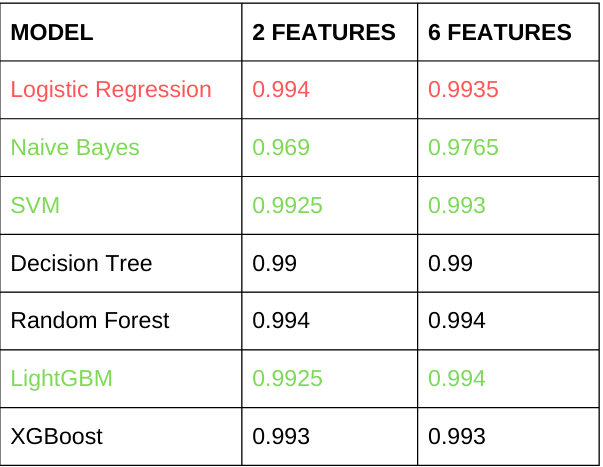 